In [16]:

// import date from date;

var date = new Date('2023-12-21UTC'),
    timezone = "europe/berlin",
    lat = 49.051944,
    lng = 11.782778;
    // height = 514;


let currentLocalDate = new Date();
const offset = currentLocalDate.getTimezoneOffset();
console.dir(offset)

0


In [25]:
// import * as sunCalc from './suncalc.js';
import SunCalc from 'npm:suncalc';

var date = new Date('2023-12-21UTC'),
    lat = 49.051944,
    lng = 11.782778;

const amplitude = 3;
const offset = -5;
const period = 0.017;

Date.prototype.addDays = function(days) {
    var date = new Date(this.valueOf());
    date.setDate(date.getDate() + days);
    return date;
}

let data = [];

for (let i = 0; i<365; i++) {
    let curDate = date.addDays(i);

    const dayOfYear = Math.floor((curDate - Date.parse(new Date().getFullYear())) / 86400000);
    const altitude = -1.0 * (amplitude * Math.sin((period*dayOfYear)-(1.377-Math.PI))+ offset);  
    // const altitude = -0.833; // sunrise

    SunCalc.addTime(altitude, 'lightOn', 'lightOff' );
    var sunPos = SunCalc.getTimes(curDate, lat, lng, 514);

    // data.push([altitude, sunPos['lightOn'], sunPos['lightOff']]);

    const onPos = sunPos[
        'lightOn'
    ];

    const offPos = sunPos[
        'lightOff'
    ];

    const lightOn = new Date("2000-1-1")
    lightOn.setHours(onPos.getHours(), onPos.getMinutes(), onPos.getSeconds(), 0)

    const lightOff = new Date("2000-1-1")
    lightOff.setHours(offPos.getHours(), offPos.getMinutes(), offPos.getSeconds(), 0)

    const sunrise = new Date("2000-1-1")
    sunrise.setHours(sunPos['sunrise'].getHours(), sunPos['sunrise'].getMinutes(), sunPos['sunrise'].getSeconds(), 0)

    const sunset = new Date("2000-1-1")
    sunset.setHours(sunPos['sunset'].getHours(), sunPos['sunset'].getMinutes(), sunPos['sunset'].getSeconds(), 0)

    data.push({
        'date': curDate,
        sunrise,
        sunset,
        lightOn,
        lightOff,
    })

    // data.push(sunPos)
}


// for (let i = 0; i<24; i++) {
//     let curDate = date.setHours(i);
//     var sunPos = SunCalc.getPosition(curDate, lat, lng);

//     data.push(sunPos)
// }

console.table(data);



// calculate the off time based on the sun altitude based on
// the day of the year.
// On will be at sunset 0 degrees
// Off will vary between -35.0 degrees on winter solstice and
// -15.0 degrees on summer solstice.
// const amplitude = 10.0;
// const offset = 35.0;
// const period = 0.017;
// const currentAltitude = msg.payload.altitude;
// const currentAzimuth = msg.payload.azimuth;
// const dayOfYear = Math.floor((Date.now() - Date.parse(new Date().getFullYear())) / 86400000);
// const offAltitude = -1.0 * (amplitude * Math.sin((period*dayOfYear)-(1.377-Math.PI))+ offset);


┌───────┬──────────────────────────┬──────────────────────────┬──────────────────────────┬──────────────────────────┬──────────────────────────┐
│ (idx) │ date                     │ sunrise                  │ sunset                   │ lightOn                  │ lightOff                 │
├───────┼──────────────────────────┼──────────────────────────┼──────────────────────────┼──────────────────────────┼──────────────────────────┤
│     0 │ 2023-12-21T00:00:00.000Z │ 2000-01-01T06:59:38.000Z │ 2000-01-01T15:24:20.000Z │ 2000-01-01T07:30:53.000Z │ 2000-01-01T14:53:05.000Z │
│     1 │ 2023-12-22T00:00:00.000Z │ 2000-01-01T07:00:09.000Z │ 2000-01-01T15:24:48.000Z │ 2000-01-01T07:31:24.000Z │ 2000-01-01T14:53:32.000Z │
│     2 │ 2023-12-23T00:00:00.000Z │ 2000-01-01T07:00:36.000Z │ 2000-01-01T15:25:18.000Z │ 2000-01-01T07:31:52.000Z │ 2000-01-01T14:54:01.000Z │
│     3 │ 2023-12-24T00:00:00.000Z │ 2000-01-01T07:01:01.000Z │ 2000-01-01T15:25:51.000Z │ 2000-01-01T07:32:17.000Z │ 2000-01-01T1

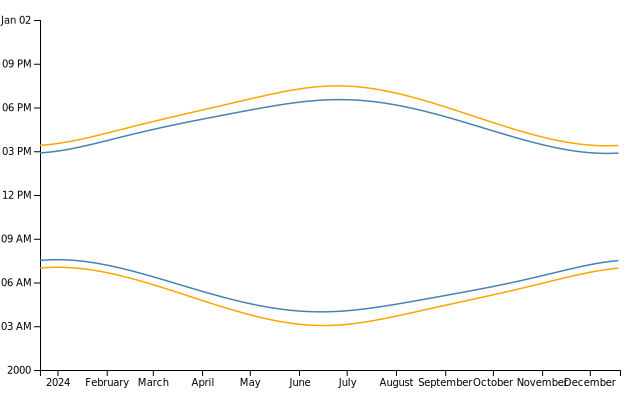

In [26]:
import * as d3 from "npm:d3"
import {DOMParser, SVGElement} from "npm:linkedom"
import { display } from "https://deno.land/x/display@v0.1.1/mod.ts"

const document = new DOMParser().parseFromString(
    `<!DOCTYPE html><html lang="en"></html>`, "text/html",
)

const width = 640;
const height = 400;
const marginTop = 20;
const marginRight = 20;
const marginBottom = 30;
const marginLeft = 40;

// Declare the x (horizontal position) scale.
const x = d3.scaleUtc()
    .domain([new Date("2023-12-21"), new Date("2024-12-20")])
    .range([marginLeft, width - marginRight]);

// Declare the y (vertical position) scale.
const y = d3.scaleTime()
    .domain([new Date("2000-1-1").setHours(0,0,0,0), new Date("2000-1-1").setHours(23,59,59,999)])
    .nice()
    // .domain([new Date().setHours(0,0,0,0), new Date().setHours(23,59,59,999)])
    .range([height - marginBottom, marginTop]);

// Create the SVG container.
const svg = d3.create("svg")
    .attr("width", width)
    .attr("height", height);

// Add the x-axis.
svg.append("g")
    .attr("transform", `translate(0,${height - marginBottom})`)
    .call(d3.axisBottom(x));

// Add the y-axis.
svg.append("g")
    .attr("transform", `translate(${marginLeft},0)`)
    .call(d3.axisLeft(y));

svg.append("path")
    .datum(data)
    .attr("fill", "none")
    .attr("stroke", "orange")
    .attr("stroke-width", 1.5)
    .attr("d", d3.line()
    .x(function(d) { return x(d.date) })
    .y(function(d) { return y(d.sunrise) })
    )

    svg.append("path")
    .datum(data)
    .attr("fill", "none")
    .attr("stroke", "orange")
    .attr("stroke-width", 1.5)
    .attr("d", d3.line()
    .x(function(d) { return x(d.date) })
    .y(function(d) { return y(d.sunset) })
    )

    svg.append("path")
    .datum(data)
    .attr("fill", "none")
    .attr("stroke", "steelblue")
    .attr("stroke-width", 1.5)
    .attr("d", d3.line()
    .x(function(d) { return x(d.date) })
    .y(function(d) { return y(d.lightOn) })
    )

    svg.append("path")
    .datum(data)
    .attr("fill", "none")
    .attr("stroke", "steelblue")
    .attr("stroke-width", 1.5)
    .attr("d", d3.line()
    .x(function(d) { return x(d.date) })
    .y(function(d) { return y(d.lightOff) })
    )

display(svg.node())
